In [19]:
# a) Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
ibm_Data=pd.read_csv("IBM_Attrition_Data.csv")

In [4]:
ibm_Data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [6]:
ibm_Data.count()

Age                        1470
Attrition                  1470
Department                 1470
DistanceFromHome           1470
Education                  1470
EducationField             1470
EnvironmentSatisfaction    1470
JobSatisfaction            1470
MaritalStatus              1470
MonthlyIncome              1470
NumCompaniesWorked         1470
WorkLifeBalance            1470
YearsAtCompany             1470
dtype: int64

In [13]:
ibm_Data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [17]:
ibm_Data.groupby(['Age']).size()

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
dtype: int64

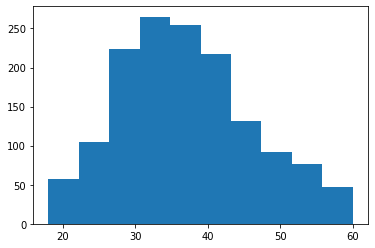

In [20]:
plt.hist(x=ibm_Data['Age'])
plt.show()


In [21]:
ibm_Data.groupby(['Attrition']).size()

Attrition
No     1233
Yes     237
dtype: int64

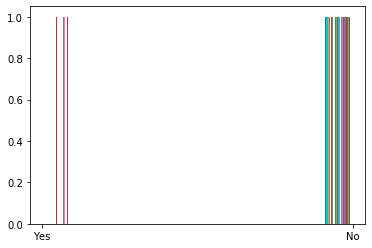

In [22]:
plt.hist(x=ibm_Data['Attrition'])
plt.show()


In [62]:
ibm_Data_New = ibm_Data



df = pd.concat([ibm_Data_New,pd.get_dummies(ibm_Data_New['Department'], prefix='Department')])

C:\Users\skelenja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [63]:
df.drop(['Department'],axis=1, inplace=True)

In [64]:
df.head()

,Age,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,NaN,NaN,NaN,1.0,2.0,Life Sciences,2.0,4.0,Single,5993.0,8.0,1.0,6.0
1,49.0,No,NaN,NaN,NaN,8.0,1.0,Life Sciences,3.0,2.0,Married,5130.0,1.0,3.0,10.0
2,37.0,Yes,NaN,NaN,NaN,2.0,2.0,Other,4.0,3.0,Single,2090.0,6.0,3.0,0.0
3,33.0,No,NaN,NaN,NaN,3.0,4.0,Life Sciences,4.0,3.0,Married,2909.0,1.0,3.0,8.0
4,27.0,No,NaN,NaN,NaN,2.0,1.0,Medical,1.0,2.0,Married,3468.0,9.0,3.0,2.0


In [81]:



df = pd.concat([df,pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')])
df.drop(['MaritalStatus'],axis=1, inplace=True)

C:\Users\skelenja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [65]:




df = pd.concat([df,pd.get_dummies(df['EducationField'], prefix='EducationField')])
df.drop(['EducationField'],axis=1, inplace=True)

C:\Users\skelenja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
df.head()

,Age,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,EducationField_Technical Degree,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,2.0,4.0,NaN,NaN,NaN,5993.0,8.0,1.0,6.0
1,49.0,0.0,NaN,NaN,NaN,8.0,1.0,NaN,NaN,NaN,...,NaN,3.0,2.0,NaN,NaN,NaN,5130.0,1.0,3.0,10.0
2,37.0,1.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,...,NaN,4.0,3.0,NaN,NaN,NaN,2090.0,6.0,3.0,0.0
3,33.0,0.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,...,NaN,4.0,3.0,NaN,NaN,NaN,2909.0,1.0,3.0,8.0
4,27.0,0.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,NaN,NaN,3468.0,9.0,3.0,2.0


In [72]:
df.dtypes

Age                                  float64
Attrition                             object
Department_Human Resources           float64
Department_Research & Development    float64
Department_Sales                     float64
DistanceFromHome                     float64
Education                            float64
EducationField_Human Resources       float64
EducationField_Life Sciences         float64
EducationField_Marketing             float64
EducationField_Medical               float64
EducationField_Other                 float64
EducationField_Technical Degree      float64
EnvironmentSatisfaction              float64
JobSatisfaction                      float64
MaritalStatus                         object
MonthlyIncome                        float64
NumCompaniesWorked                   float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
dtype: object

In [75]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x=='No' else 1)

In [83]:
df.dtypes

Age                                  float64
Attrition                            float64
Department_Human Resources           float64
Department_Research & Development    float64
Department_Sales                     float64
DistanceFromHome                     float64
Education                            float64
EducationField_Human Resources       float64
EducationField_Life Sciences         float64
EducationField_Marketing             float64
EducationField_Medical               float64
EducationField_Other                 float64
EducationField_Technical Degree      float64
EnvironmentSatisfaction              float64
JobSatisfaction                      float64
MaritalStatus_Divorced               float64
MaritalStatus_Married                float64
MaritalStatus_Single                 float64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
dtype: obj

In [87]:
df['Attrition'] = df['Attrition'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [90]:
df.head()

,Age,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,EducationField_Technical Degree,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,2.0,4.0,NaN,NaN,NaN,5993.0,8.0,1.0,6.0
1,49.0,0.0,NaN,NaN,NaN,8.0,1.0,NaN,NaN,NaN,...,NaN,3.0,2.0,NaN,NaN,NaN,5130.0,1.0,3.0,10.0
2,37.0,1.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,...,NaN,4.0,3.0,NaN,NaN,NaN,2090.0,6.0,3.0,0.0
3,33.0,0.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,...,NaN,4.0,3.0,NaN,NaN,NaN,2909.0,1.0,3.0,8.0
4,27.0,0.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,NaN,NaN,3468.0,9.0,3.0,2.0


In [95]:
df1.isna().sum()

Age                                  0
Attrition                            0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
DistanceFromHome                     0
Education                            0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
EnvironmentSatisfaction              0
JobSatisfaction                      0
MaritalStatus_Divorced               0
MaritalStatus_Married                0
MaritalStatus_Single                 0
MonthlyIncome                        0
NumCompaniesWorked                   0
WorkLifeBalance                      0
YearsAtCompany                       0
dtype: int64

In [93]:
df1=df.fillna(0)

In [113]:
df1.head()

,Age,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,EducationField_Technical Degree,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,1,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,2.0,4.0,0.0,0.0,0.0,5993.0,8.0,1.0,6.0
1,49.0,0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,0.0,5130.0,1.0,3.0,10.0
2,37.0,1,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,2090.0,6.0,3.0,0.0
3,33.0,0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,2909.0,1.0,3.0,8.0
4,27.0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,3468.0,9.0,3.0,2.0


In [96]:
df1['Attrition'] = df1['Attrition'].astype(int)

In [99]:
df1.dtypes

Age                                  float64
Attrition                              int32
Department_Human Resources           float64
Department_Research & Development    float64
Department_Sales                     float64
DistanceFromHome                     float64
Education                            float64
EducationField_Human Resources       float64
EducationField_Life Sciences         float64
EducationField_Marketing             float64
EducationField_Medical               float64
EducationField_Other                 float64
EducationField_Technical Degree      float64
EnvironmentSatisfaction              float64
JobSatisfaction                      float64
MaritalStatus_Divorced               float64
MaritalStatus_Married                float64
MaritalStatus_Single                 float64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
dtype: obj

In [105]:
X=df1.loc[:, df.columns != 'Attrition']

In [106]:
X.head()

,Age,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,EducationField_Technical Degree,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,2.0,4.0,0.0,0.0,0.0,5993.0,8.0,1.0,6.0
1,49.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,0.0,5130.0,1.0,3.0,10.0
2,37.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,2090.0,6.0,3.0,0.0
3,33.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,2909.0,1.0,3.0,8.0
4,27.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,3468.0,9.0,3.0,2.0


In [114]:
Y=df1.loc[:,df1.columns == 'Attrition']

In [115]:
Y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [116]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(18816, 21) (18816, 1)
(4704, 21) (4704, 1)


In [119]:
from sklearn.linear_model import LogisticRegression
seed=16
model = LogisticRegression(random_state=seed)

In [120]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\skelenja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skelenja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.9207057823129252
